<a href="https://colab.research.google.com/github/dhanshri8625/codsoft-Task-2/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # for saving models

# Load file (assumes IRIS.csv in current folder)
df = pd.read_csv("/content/IRIS.csv")

# Quick checks
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Basic info
print(df.info())
print(df['species'].value_counts())   # species distribution

# Descriptive stats
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


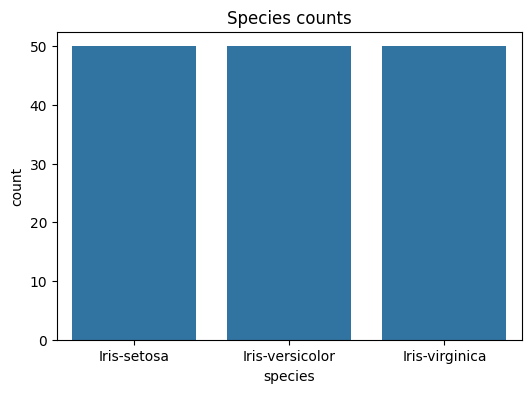

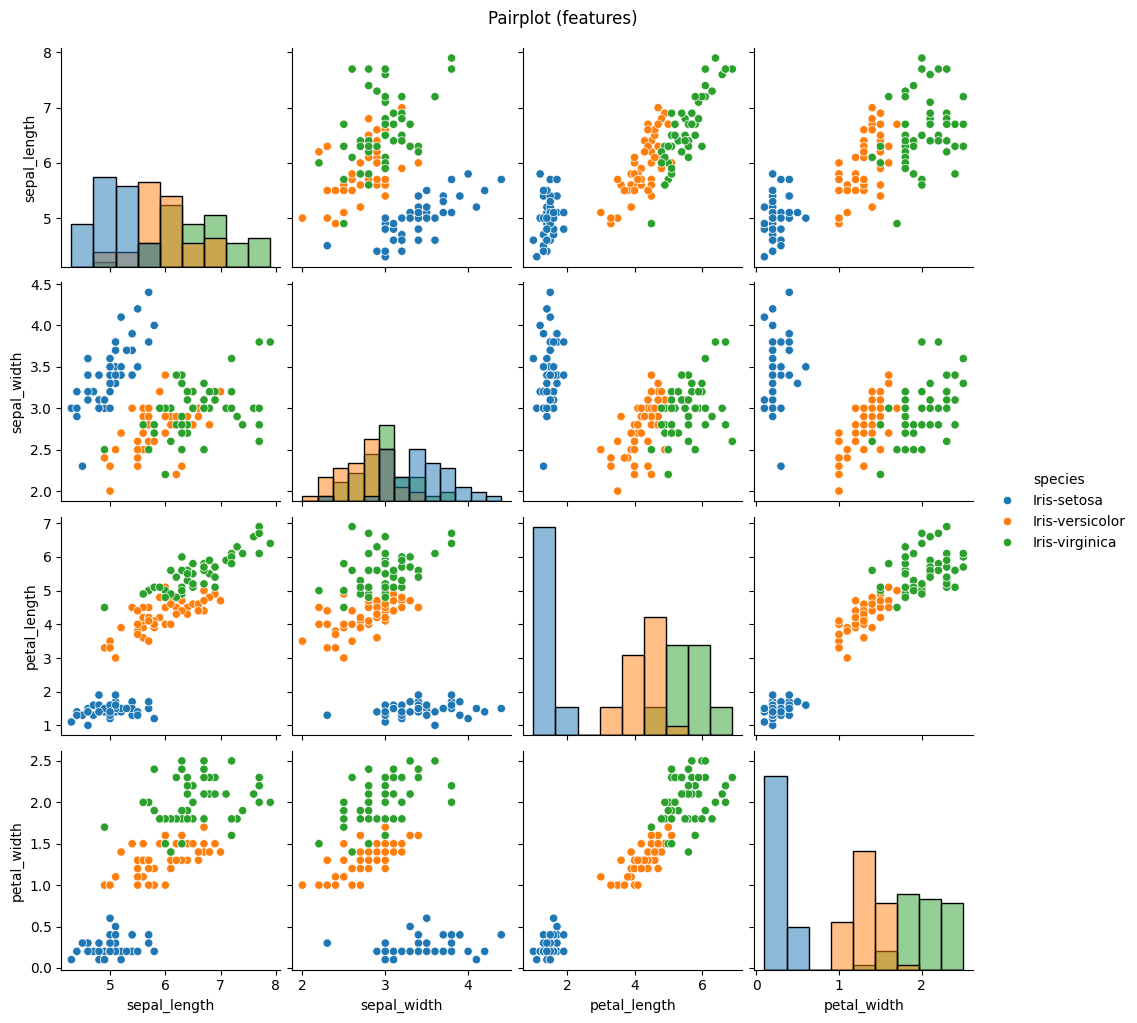

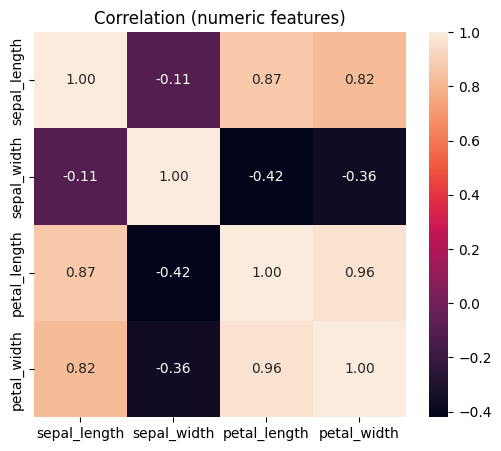

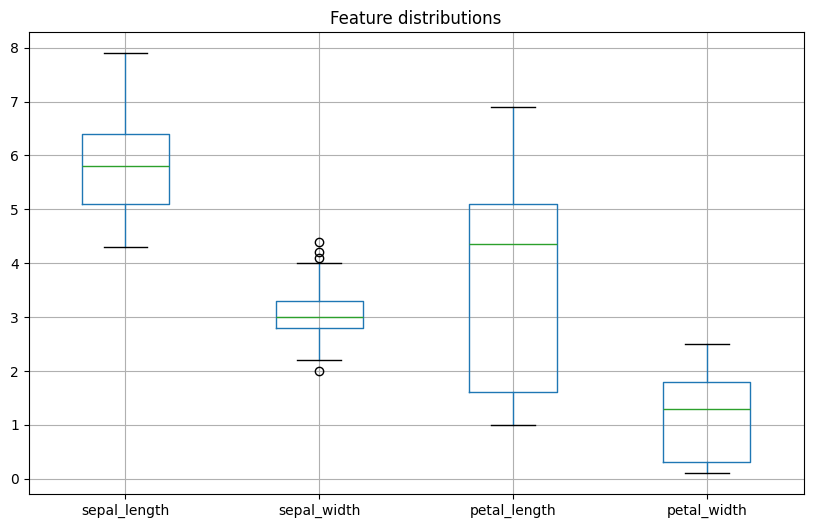

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=df)
plt.title("Species counts")
plt.show()

# Pairplot — shows separation across feature pairs
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Pairplot (features)", y=1.02)
plt.show()

# Correlation heatmap (numeric columns)
plt.figure(figsize=(6,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f")
plt.title("Correlation (numeric features)")
plt.show()

# Boxplots to inspect distributions / outliers
plt.figure(figsize=(10,6))
df.select_dtypes(include=[np.number]).boxplot()
plt.title("Feature distributions")
plt.show()


In [ ]:
# Label encode target
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])  # 0,1,2

# Select feature columns robustly (if your CSV uses typical names)
expected = ['sepal_length','sepal_width','petal_length','petal_width']
if all(c in df.columns for c in expected):
    X = df[expected].copy()
else:
    # Fallback: use all numeric columns except encoded target if necessary
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric = [c for c in numeric if c != 'species_encoded']
    X = df[numeric].copy()

y = df['species_encoded']
print("Features used:", X.columns.tolist())


Features used: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [ ]:
# choose X_scaled or X depending on whether you scaled
X_train, X_test, y_train, y_test = train_test_split(X_scaled if 'X_scaled' in globals() else X,
                                                    y, test_size=0.2, random_state=42, stratify=y)
print("Train/test sizes:", X_train.shape, X_test.shape)


Train/test sizes: (120, 4) (30, 4)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.



Logistic Regression — Accuracy: 0.9667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



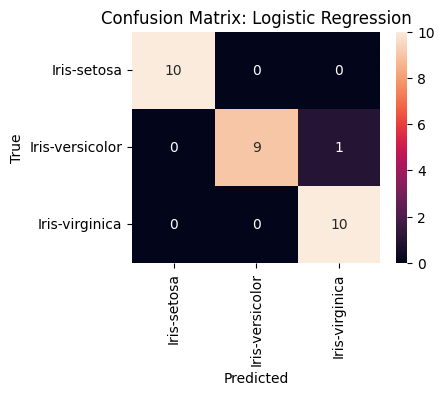


Decision Tree — Accuracy: 0.9333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



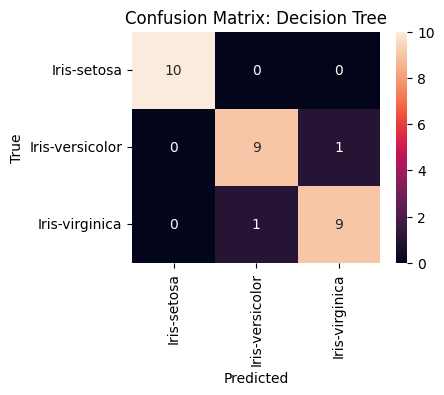


Random Forest — Accuracy: 0.9000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



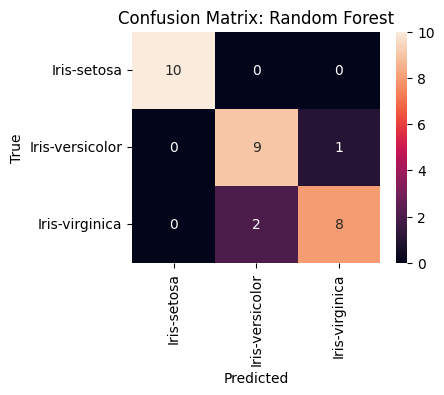

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} — Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


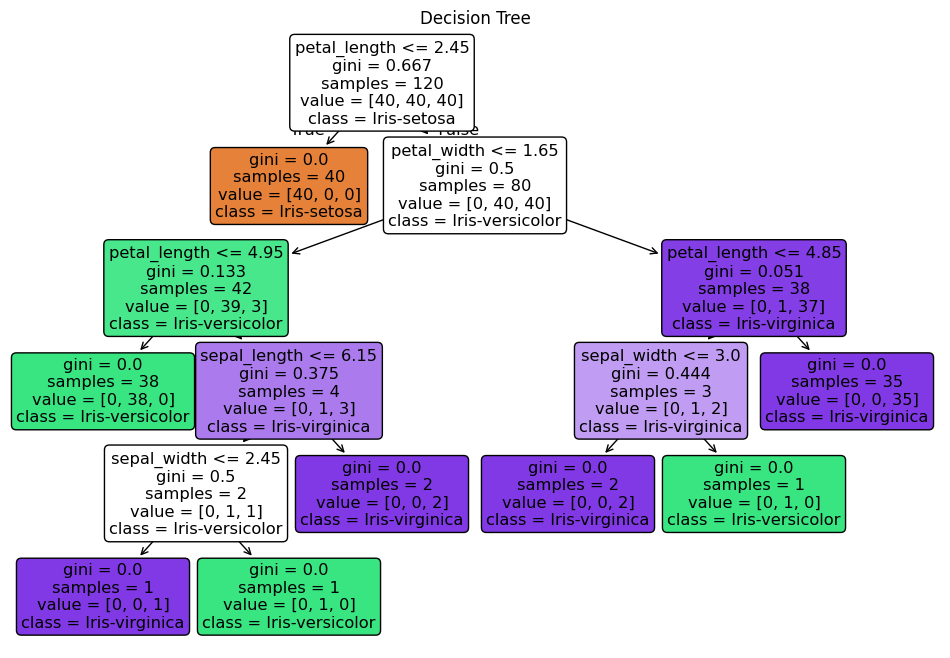

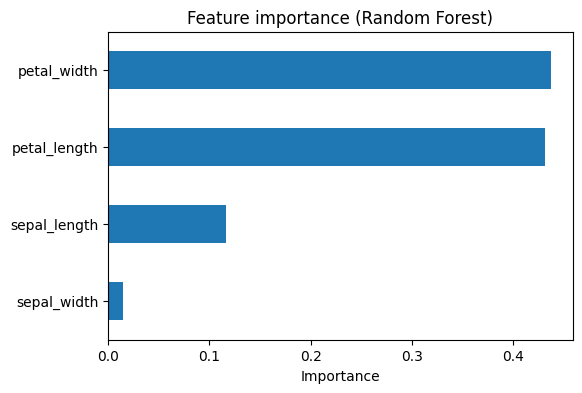

In [ ]:
# Decision Tree plot
plt.figure(figsize=(12,8))
plot_tree(models["Decision Tree"], feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

# Random Forest feature importance
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(6,4))
feat_imp.plot(kind='barh')
plt.title("Feature importance (Random Forest)")
plt.xlabel("Importance")
plt.show()
